In [ ]:
! pip install scikit-commpy

In [ ]:
#Data
import numpy as np
import commpy.channelcoding.convcode as cc
import commpy.modulation as modulation
import numpy as np
N= 125 #Number of subcarriers in time slot
L=4 #number of time slots
NL=N*L #number of subcarriers
M = 4 # modulation order (QPSK)
K = int(np.log2(M)) #number of bit per modulation symbol
Data1 = np.random.randint(2,size=(K*N*L))
print(Data1)
print(Data1.shape)
#M = 4 # modulation order (QPSK)
#K = np.log2(M) #number of bit per modulation symbol
modem = modulation.PSKModem(M) # M-PSK modem initialization
modulated_uncoded = modem.modulate(Data1) 
#modulated = modem.modulate(Data1) # modulation
#print(modulated_uncoded)
#print(modulated_uncoded.shape)
#print(modulated[2])
#shape of needed signal
Data= np.zeros((N,L), dtype=complex)
p=0
i=0
t=0
while i<L:
      k=0
      while k<N:
            g=modulated_uncoded[t]
            Data[k,i]=g
            t+=1            
            k+=1
      i+=1
print(Data)
print(Data.shape)
#IFFT
p=0
Data_ifft = np.zeros((N,L), dtype=complex)  #per column
while p<L:
      Data_ifft[:,p]= np.fft.ifft(Data[:,p])
      p+=1
#print(Data_ifft)

#Data_ifft = np.fft.ifft(Data)
data_final = Data_ifft

#PAPR
s=0
PAPR = np.zeros(L)
while s<L:
      PAPR1 = np.convolve(data_final[:,s],np.conj(data_final[:,s]))
      max=np.max(PAPR1.real)
      mean=np.mean(PAPR1.real)
      PAPR=max/mean
 #     print('PAPR of symbol',s+1,'=',PAPR)
      #g=np.max(np.abs(data_final[:,s])**2)/np.mean(np.abs(data_final[:,s])**2)
      #PAPR[s]=g
      s+=1
#print(PAPR)

#CP
Channel=[1,0.5,0.25]
#length of cycle prefix must be >= length of channel
CP = Data_ifft[N-3:N,:]
#print(CP)
Data_CP = np.vstack((CP, Data_ifft))
#print(Data_CP)
data_final = Data_CP
#print(data_final.shape)

#P/S with CP
i = 0
s = 0
t = 0
serial_data = np.zeros(((N+3)*L), dtype=complex)
while i < L:
      k=0
      while k < N+3: 
            g=(data_final[k,i])
            serial_data[t]=g
            t+=1
            k+=1
      i+=1    
#print(serial_data)
#print(serial_data.shape)

#convolution between data and channel
from scipy.ndimage import convolve
data_rx_H = np.convolve(serial_data,Channel)
#print(data_rx_H)
#print(data_rx_H.shape)


[1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1
 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1
 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 1 0 1 0 1 1 0 1 0 0 1 

In [ ]:
draw = np.zeros((100,13))
eteration=0
EbNo=0
while EbNo <= 12:
      eteration=0
      while eteration < 100:
            #noise
            #EbNo = 12   # energy per bit to noise power spectral density ratio (in dB)
            #rate=1   #rate =1 as signal is uncoded
            #snrdB = EbNo + 10*np.log10(2*rate)+10*np.log10(N*L)+10*np.log10()   #2=K=np.log2(M), Signal-to-Noise ratio per symbol (in dB) 
            Es = np.mean(np.abs(modulated_uncoded)**2)   # symbol energy
            No = Es/((10**(EbNo/10))*np.log2(M))   # noise spectrum density                                                                                 
            data_rx = data_rx_H + np.sqrt(No/2)*(np.random.randn(data_rx_H.shape[0]))#+1j*np.random.randn(data_rx_H.shape[0]))   # AWGN (uncoded case)                                                                                                   
            #print(data_rx)                                                                                  
            #print(data_rx.shape)    

            #reshaping data with CP
            data_rx1 = data_rx[0:1200]
            #print(data_rx1)
            i = 0
            s = 0
            t=0
            reshaped_data = np.zeros(((N+3),L), dtype=complex)
            while i < L:
                  k=0
                  while k < N+3: #19
                        g=(data_rx1[t])
                        reshaped_data[k,i]=g
                        t+=1
                        k+=1
                  i+=1    
            #print(reshaped_data)
            #print(reshaped_data.shape)

            #Removing cycle Prefix
            data_without_CP = reshaped_data[3:N+3,:]
            #print(data_without_CP)

            #FFT
            import scipy as sp

            data_without_CP_or_fft = np.zeros((N,L), dtype=complex)

            p=0
            while p<L:
                  data_without_CP_or_fft[:,p]= np.fft.fft(data_without_CP[:,p])
                  p+=1
            #print(data_without_CP_or_fft)
            #print(data_without_CP_or_fft.shape)

            #channel equalyzier
            import numpy as np
            from numpy import matrix
            from numpy import linalg
            #data_recover = np.zeros((N,L), dtype=complex)
            data_recover1 = np.zeros((N,L), dtype=complex)
            H_transpose = np.zeros((N*L,1), dtype=complex)
            H= np.fft.fft(Channel,N)
            #H_transpose=H.transpose()
            k=0
            while k < N:
                  g=(H[k])
                  H_transpose[k,0]=g
                  k+=1
            #print(H_transpose)
            #print(H)
            #print(H_transpose)
            #print(H.shape)
            #print(H_transpose.shape)
            #H_real=H.real
            #print(H_real)
            #print(data_without_CP_or_fft)
            i=0
            while i<L:
                  #data_recover[:,i]=np.divide(data_without_CP_or_fft[:,i],H_real)
                  data_recover1[:,i]=data_without_CP_or_fft[:,i]/H
                  i+=1
            #data_recover2=data_recover1.real
            #print(data_recover1)
            #print(data_recover)
            #print(data_recover.shape)

            #P/S with CP
            i = 0
            s = 0
            t = 0
            serial_data = np.zeros((N*L), dtype=complex)
            while i < L:
                  k=0
                  while k < N: 
                        g=(data_recover1[k,i])
                        serial_data[t]=g
                        t+=1
                        k+=1
                  i+=1    
            #print(serial_data)

            demodulated_uncoded = modem.demodulate(serial_data, demod_type='hard') # demodulation (uncoded case)
            #print(demodulated_uncoded)
            #print(demodulated_uncoded.shape)

            #BER_calculation
            N_c = K*N*L # number of bits
            i=0
            BER_uncoded = np.zeros(N_c)
            def BER_calc(a, b):      #func_compare_bet_the_original_and_transmitted_data
                ber = a-b                     #if bits are equal return 0 else return 1 
                while ber==0:
                      return 0
                else:
                    return 1
            while i<N_c:
                  BER_uncoded[i] = BER_calc(Data1[i], demodulated_uncoded[i]) # bit-error ratio 
                  i+=1
            #print(BER_uncoded)

            mean_BER_uncoded = BER_uncoded.mean() # averaged bit-error ratio (uncoded case)
            #print(mean_BER_uncoded,EbNo,No)
            similarity=1-mean_BER_uncoded #the similarity between the recieved and original signal
            #print('similarity between the recieved and original signal =',similarity*100, '%')
            draw[eteration,EbNo]=mean_BER_uncoded
            eteration+=1
      EbNo+=1
print(draw[5,2])
q=0
o=0
ww = np.zeros((13), dtype=float)
while o<=12:
      w=0
      q=0
      while q<100:
            w=w+draw[q,o]
            q+=1
      ww[o]=w/100
      o+=1      
print(ww)
f=0
ff = np.zeros((13), dtype=int)
while f<13:    
      ff[f]=f
      f+=1
print(ff)

0.427
[0.42351 0.41677 0.4064  0.39384 0.381   0.36653 0.35755 0.33622 0.32122
 0.30047 0.27785 0.25539 0.23112]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


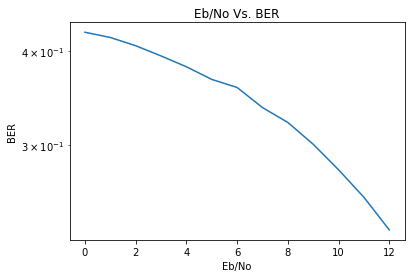

In [ ]:
# DRAW BER
import matplotlib.pyplot as plt
 
# plotting the points
plt.plot(ff, ww)
plt.yscale('log')
# naming the x axis
plt.xlabel('Eb/No')
# naming the y axis
plt.ylabel('BER')
 
# giving a title to my graph
plt.title('Eb/No Vs. BER')
 
# function to show the plot
plt.show()